In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# creating df1 from pl file for pid, survey year, chores, errands, repairs, childbirth, health

# Path to your SPSS file from SOEP repository
file_path = "/path/to/your/data/pl.sav"

# Specify columns to read
usecols = ['syear','pli0043_h', 'pid', 'pli0040', 'pli0049_h','ple0040', 'hid', 'pld0152','ple0008']

df1 = pd.read_spss(file_path, usecols=usecols)

# Downcast data types to reduce memory usage
df1[usecols] = df1[usecols].apply(pd.to_numeric, errors='coerce', downcast='float')

# Replace values less than 0 with NaN
df1 = df1.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)

# Sort by 'pid' and then by 'syear'
df1 = df1.sort_values(by=['pid', 'syear'])

# Remove disabled individuals
df1 = df1[df1['ple0040'] != 1]

# Rename columns
df1.rename(columns={'pli0043_h': 'chores_hours', 'pli0040': 'errands_hours', 'pli0049_h': 'repairs_hours', 'pld0152': 'childbirth', 'ple0008': 'health'}, inplace=True)

# Filter for years between 2011 and 2021
df1 = df1[(df1['syear'] >= 2011) & (df1['syear'] <= 2021)]

# df1 with columns pid, year, chores, errands, repairs, childbirth, health
print(df1)

               pid        hid   syear  childbirth  health  ple0040  \
448220       602.0       60.0  2011.0         NaN     NaN      NaN   
476953       602.0       60.0  2012.0         NaN     NaN      NaN   
448221       901.0       94.0  2011.0         NaN     NaN      NaN   
476954       901.0       94.0  2012.0         NaN     NaN      NaN   
504936       901.0       94.0  2013.0         NaN     NaN      NaN   
...            ...        ...     ...         ...     ...      ...   
763218  55549002.0  5554900.0  2021.0         NaN     NaN      NaN   
763219  55560402.0  5556040.0  2021.0         NaN     NaN      NaN   
763220  55562402.0  5556240.0  2021.0         NaN     NaN      NaN   
763221  55564702.0  5556470.0  2021.0         NaN     NaN      NaN   
763222  55572102.0  5557210.0  2021.0         NaN     NaN      NaN   

        errands_hours  chores_hours  repairs_hours  
448220            1.0           2.0            1.0  
476953            1.0           4.0            1.0  


In [7]:
# using ppathl file for pid, sex, birth year, survey year, hid

# load Soep dataset ppathl.sav
file_path = "/path/to/your/data/ppathl.sav"
use_cols = ['pid', 'sex', 'gebjahr', 'syear', 'hid']  

# Read the SPSS file making it df2           
df2 = pd.read_spss(file_path, usecols=use_cols)

# drop duplicates for each survey year
df2 = df2.drop_duplicates(subset=['pid', 'syear'])  

# Calculate age based on survey year
df2['age_at_survey'] = df2['syear'] - df2['gebjahr']

# Filter for age between 24 and 62 at the time of the survey
df2_filtered_age = df2[(df2['age_at_survey'] >= 18) & (df2['age_at_survey'] <= 66)]

# filter syear from 2011 to 2021
df2_filtered_age = df2_filtered_age[(df2_filtered_age['syear'] >= 2011) & (df2_filtered_age['syear'] <= 2021)]

# make sex column responses 1 for  [1] Male 2 for [2] Female
df2_filtered_age['sex'] = df2_filtered_age['sex'].replace({'[1] Male': 1, '[2] Female': 2})

# Display the filtered dataframe with hid, pid, sex, gebjahr, syear, age_at_survey
print(df2_filtered_age)

               hid         pid   syear sex  gebjahr  age_at_survey
189           60.0       602.0  2011.0   2   1958.0           53.0
190           60.0       602.0  2012.0   2   1958.0           54.0
191           60.0       602.0  2013.0   2   1958.0           55.0
214           60.0       603.0  2011.0   1   1946.0           65.0
215           60.0       603.0  2012.0   1   1946.0           66.0
...            ...         ...     ...  ..      ...            ...
1285057  5557210.0  55572102.0  2021.0   1   1994.0           27.0
1285058  5557620.0  55576202.0  2021.0   1   1989.0           32.0
1285059  5557630.0  55576302.0  2021.0   2   1992.0           29.0
1285060  5557890.0  55578902.0  2021.0   1   1993.0           28.0
1285061  5557950.0  55579502.0  2021.0   1   1999.0           22.0

[377960 rows x 6 columns]


In [8]:
# using hbrutto file for hid, survey year, household size (hhgr)
# load SOEP dataset hbrutto.sav
file_path = "/path/to/your/data/hbrutto.sav"

# Specify columns to read
use_cols = ['hid', 'syear', 'hhgr']

# Read the SPSS file to create df3
df3 = pd.read_spss(file_path, usecols=use_cols)

# Replace specific hhgr values with NaN
df3['hhgr'] = df3['hhgr'].replace({
    '[0] Terminated/untreated HH': np.nan,
    '[-1] No Answer': np.nan,
    '[-2] Does Not Apply': np.nan,
    '[-3] Answer Improbable': np.nan,
    '[-4] Inadmissible Multiple Answer': np.nan,
    '[-5] Not Contained In Questionnaire': np.nan,
    '[-6] Questionnaire Version With Modified Filtering': np.nan
})

# Downcast data types to reduce memory usage
df3[use_cols] = df3[use_cols].apply(pd.to_numeric, errors='coerce', downcast='integer')

# Filter for years between 2011 and 2021
df3 = df3[(df3['syear'] >= 2011) & (df3['syear'] <= 2021)]

# Display the filtered dataframe with hid, survey year, hhgr
print(df3)

            hid  syear  hhgr
263417       60   2011   3.0
263418       94   2011   1.0
263419      159   2011   1.0
263420      167   2011   1.0
263421      230   2011   1.0
...         ...    ...   ...
501617  5558010   2021   1.0
501618  5558020   2021   1.0
501619  5558030   2021   1.0
501620  5558040   2021   2.0
501621  5558050   2021   1.0

[238205 rows x 3 columns]


In [9]:
# Convert 'hid' and 'syear' to numeric types in both DataFrames
df2_filtered_age['hid'] = pd.to_numeric(df2_filtered_age['hid'], errors='coerce')
df2_filtered_age['syear'] = pd.to_numeric(df2_filtered_age['syear'], errors='coerce')

df3['hid'] = pd.to_numeric(df3['hid'], errors='coerce')
df3['syear'] = pd.to_numeric(df3['syear'], errors='coerce')

In [10]:
#merge df2 and df4 on hid
df_merge = df2_filtered_age.merge(df3, on= ['hid', 'syear'], how= 'outer')

# Display the merged dataframe with hid, pid, sex, gebjahr, syear, age_at_survey, household size(hhgr)
print(df_merge)

              hid    pid   syear  sex  gebjahr  age_at_survey  hhgr
0            60.0  602.0  2011.0    2   1958.0           53.0   3.0
1            60.0  603.0  2011.0    1   1946.0           65.0   3.0
2            60.0  602.0  2012.0    2   1958.0           54.0   3.0
3            60.0  603.0  2012.0    1   1946.0           66.0   3.0
4            60.0  602.0  2013.0    2   1958.0           55.0   3.0
...           ...    ...     ...  ...      ...            ...   ...
412310  5556310.0    NaN  2021.0  NaN      NaN            NaN   1.0
412311  5556340.0    NaN  2021.0  NaN      NaN            NaN   NaN
412312  5556420.0    NaN  2021.0  NaN      NaN            NaN   NaN
412313  5556540.0    NaN  2021.0  NaN      NaN            NaN   1.0
412314  5556570.0    NaN  2021.0  NaN      NaN            NaN   1.0

[412315 rows x 7 columns]


In [12]:
# Merge df1 and df_merge on 'pid', 'syear'
df4 = df_merge.merge(df1, on= ['pid', 'syear'])
df4.reset_index(inplace=True)

# add chores_hours, errands_hours, repairs_hours to housework_hours
df4['avg_housework_per_day'] = df4['chores_hours'] + df4['errands_hours'] + df4['repairs_hours']

# count number of people answering in 2011
df4_2011 = df4[df4['syear'] == 2011]
unique_pid_count = df4_2011.pid.nunique()
print(f"The number of unique 'pid' values in df4 is: {unique_pid_count}")

# Filter individuals with less than 2.5 total per day housework in 2011 (baseline)
df4_2011_perday = df4[(df4['syear'] == 2011) & (df4['avg_housework_per_day'] < 2.5)]
pids_with_threshold_housework_2011 = df4_2011_perday.pid.unique()

# Count the unique 'pid' values 
unique_pid_count = df4_2011_perday.pid.nunique()
print(f"The number of unique 'pid' values in df4_2011_3 is: {unique_pid_count}")

The number of unique 'pid' values in df4 is: 23748
The number of unique 'pid' values in df4_2011_3 is: 10728


In [13]:
# Filter for the year 2012
filtered_df_2012 = df4[df4['syear'] == 2012]

# Check if pids are in the list of pids_with_zero_housework_2011
filtered_df_2012 = filtered_df_2012[filtered_df_2012['pid'].isin(pids_with_threshold_housework_2011)]

# Get the pids that appear in 2012
pids_in_2012 = filtered_df_2012['pid'].unique()

# Get the filtered DataFrame with pids in both 2011 and 2012
final_pids = df4[(df4['pid'].isin(pids_in_2012)) & (df4['syear'].isin([2011, 2012]))]

# Display the final filtered DataFrame with pid, syear, avg_housework_per_day , chores_hours, errands_hours, repairs_hours, childbirth, health, age_at_survey, sex, hhgr and more
print(final_pids)


         index      hid_x         pid   syear sex  gebjahr  age_at_survey  \
9            9      159.0      1501.0  2011.0   1   1958.0           53.0   
10          10      159.0      1501.0  2012.0   1   1958.0           54.0   
21          21      230.0      2301.0  2011.0   1   1946.0           65.0   
22          22      230.0      2301.0  2012.0   1   1946.0           66.0   
23          23    65889.0      2302.0  2011.0   2   1946.0           65.0   
...        ...        ...         ...     ...  ..      ...            ...   
194732  194732  3097705.0  30977002.0  2012.0   1   1959.0           53.0   
194774  194774  3097888.0  30978801.0  2011.0   1   1960.0           51.0   
194776  194776  3097888.0  30978803.0  2011.0   1   1990.0           21.0   
194777  194777  3097888.0  30978801.0  2012.0   1   1960.0           52.0   
194779  194779  3097888.0  30978803.0  2012.0   1   1990.0           22.0   

        hhgr      hid_y  childbirth  health  ple0040  errands_hours  \
9   

In [14]:
# Aggregate the data by 'pid' and 'syear' to calculate the average housework per day
df_aggregated = final_pids.groupby(['pid', 'syear'])['avg_housework_per_day'].mean().reset_index()

# Pivot the data to have years as columns for easy access
pivot_df = df_aggregated.pivot(index='pid', columns='syear', values='avg_housework_per_day')

# Calculate the binary treatment
# Control: less than 2.5 hours of average housework in both 2012 
# Treatment: More than or equal to 2.5 hours of average housework hours in 2012
pivot_df['binary_treatment'] = ((pivot_df[2012] >= 2.5)).astype(int)

# Add pid back to the dataframe
pivot_df.reset_index(inplace=True)

# Select relevant columns to display
binary_treatment_df = pivot_df[['pid', 'binary_treatment']]

# Display the first few rows of the resulting dataframe
print(binary_treatment_df)

#count the unique pids in 1s and 0s in binary_treatment
binary_treatment_count = binary_treatment_df['binary_treatment'].value_counts()
print(binary_treatment_count)

syear         pid  binary_treatment
0          1501.0                 0
1          2301.0                 1
2          2302.0                 1
3          5202.0                 0
4          5303.0                 0
...           ...               ...
8821   30976802.0                 1
8822   30977001.0                 0
8823   30977002.0                 0
8824   30978801.0                 1
8825   30978803.0                 0

[8826 rows x 2 columns]
0    5995
1    2831
Name: binary_treatment, dtype: int64


In [15]:
#merge binary_treatment_df with final_pids on pid
final_df = final_pids.merge(binary_treatment_df, on='pid', how='left')

# drop chores_hours, errands_hours, repairs_hours, pli0040, childbirth columns as they are non necessary or dont have enough data
final_df.drop(['chores_hours', 'errands_hours', 'repairs_hours', 'ple0040', 'childbirth'], axis=1, inplace=True)

# Display the final DataFrame
print(final_df)

        index      hid_x         pid   syear sex  gebjahr  age_at_survey  \
0           9      159.0      1501.0  2011.0   1   1958.0           53.0   
1          10      159.0      1501.0  2012.0   1   1958.0           54.0   
2          21      230.0      2301.0  2011.0   1   1946.0           65.0   
3          22      230.0      2301.0  2012.0   1   1946.0           66.0   
4          23    65889.0      2302.0  2011.0   2   1946.0           65.0   
...       ...        ...         ...     ...  ..      ...            ...   
17647  194732  3097705.0  30977002.0  2012.0   1   1959.0           53.0   
17648  194774  3097888.0  30978801.0  2011.0   1   1960.0           51.0   
17649  194776  3097888.0  30978803.0  2011.0   1   1990.0           21.0   
17650  194777  3097888.0  30978801.0  2012.0   1   1960.0           52.0   
17651  194779  3097888.0  30978803.0  2012.0   1   1990.0           22.0   

       hhgr      hid_y  health  avg_housework_per_day  binary_treatment  
0       1.0  

In [20]:
#load csv file with baseline outcomes and education as covariates_df
covariates_df = pd.read_csv("/path/to/your/directory/N.covariates.csv")

# merge final_df with df5 on pid and syear and syear
df5 = final_df.merge(covariates_df, on=['pid', 'syear'], how='left')

# drop unnecessary columns
df5.drop(['hid_x', 'hid_y', 'empl_status', 'gebjahr', 'index', 'health'], axis=1, inplace=True)

# Display the final DataFrame with necssary columns pid, syear, avg_housework_per_day, age_at_survey, sex, education, hhgr, binary_treatment, gross_income, lf_status, working_hours
print(df5)

              pid   syear sex  age_at_survey  hhgr  avg_housework_per_day  \
0          1501.0  2011.0   1           53.0   1.0                    1.0   
1          1501.0  2012.0   1           54.0   1.0                    0.0   
2          2301.0  2011.0   1           65.0   1.0                    2.0   
3          2301.0  2012.0   1           66.0   1.0                    3.0   
4          2302.0  2011.0   2           65.0   1.0                    2.0   
...           ...     ...  ..            ...   ...                    ...   
17647  30977002.0  2012.0   1           53.0   2.0                    2.0   
17648  30978801.0  2011.0   1           51.0   3.0                    1.0   
17649  30978803.0  2011.0   1           21.0   3.0                    0.0   
17650  30978801.0  2012.0   1           52.0   3.0                    3.0   
17651  30978803.0  2012.0   1           22.0   3.0                    0.0   

       binary_treatment      hid  marital_status  gross_income  lf_status  

C:\Users\purti\AppData\Local\Temp\ipykernel_148\3291638208.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  covariates_df = pd.read_csv(r"C:\Users\purti\Downloads\Thesis codes\N.covariates.csv")


In [ ]:
df5.to_csv("/path/to/your/directory/N.2012_ONLY.csv", index=False)

In [23]:
# calculating percentages for data section
df_2011 = df4[df4['syear'] == 2011]

# Step 2: Filter for people with positive working hours
df_positive_hours = df_2011[df_2011['avg_housework_per_day'] > 0]

# Step 3: Group by avg_housework_per_day and count the number of people (pid)
housework_counts = df_positive_hours.groupby('avg_housework_per_day')['pid'].count()

# Step 4: Calculate the total number of people with positive working hours
total_people = housework_counts.sum()

# Calculate the percentages for specific hours of housework
percent_1_hour = (housework_counts.loc[1] / total_people) * 100 if 1 in housework_counts.index else 0
percent_2_hours = (housework_counts.loc[2] / total_people) * 100 if 2 in housework_counts.index else 0
percent_3_or_more_hours = (housework_counts[housework_counts.index >= 3].sum() / total_people) * 100

# Display the percentages
print(f"Percentage for 1 hour: {percent_1_hour:.2f}%")
print(f"Percentage for 2 hours: {percent_2_hours:.2f}%")
print(f"Percentage for 3 or more hours: {percent_3_or_more_hours:.2f}%")

Percentage for 1 hour: 14.47%
Percentage for 2 hours: 24.64%
Percentage for 3 or more hours: 60.89%


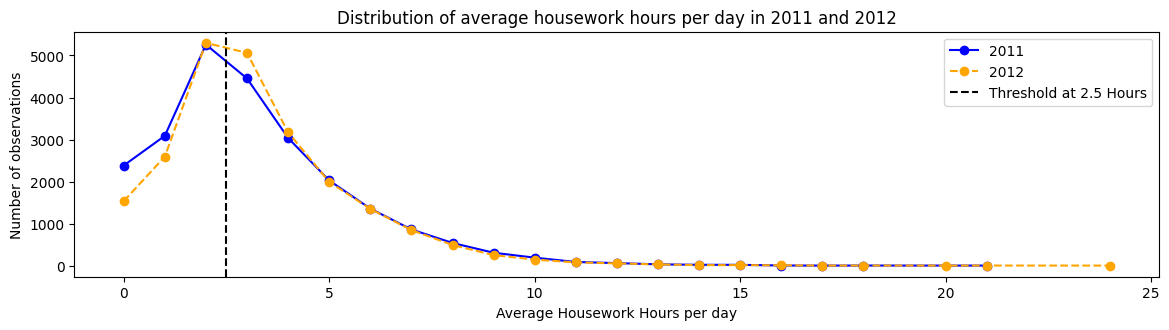

In [39]:
# plotting the distribution of average housework hours per day in 2011 and 2012 for the entire population

# Filter data for 2011 and 2012
data_2011 = df4[df4['syear'] == 2011]
data_2012 = df4[df4['syear'] == 2012]

# Group by avg_housework_per_weekday and count number of individuals
grouped_2011_basic = data_2011.groupby('avg_housework_per_day').size()
grouped_2012_basic = data_2012.groupby('avg_housework_per_day').size()

plt.figure(figsize=(14, 7))

# 2011 Basic Plot
plt.subplot(2, 1, 1)
plt.plot(grouped_2011_basic.index, grouped_2011_basic.values, label='2011', marker='o', color='blue')
plt.plot(grouped_2012_basic.index, grouped_2012_basic.values, label='2012', marker='o', linestyle='--', color='orange')

# Threshold line at 2.5 hours
plt.axvline(x=2.5, color='black', linestyle='--', label='Threshold at 2.5 Hours')

plt.title('Distribution of average housework hours per day in 2011 and 2012')
plt.xlabel('Average Housework Hours per day')
plt.ylabel('Number of observations')
plt.legend()

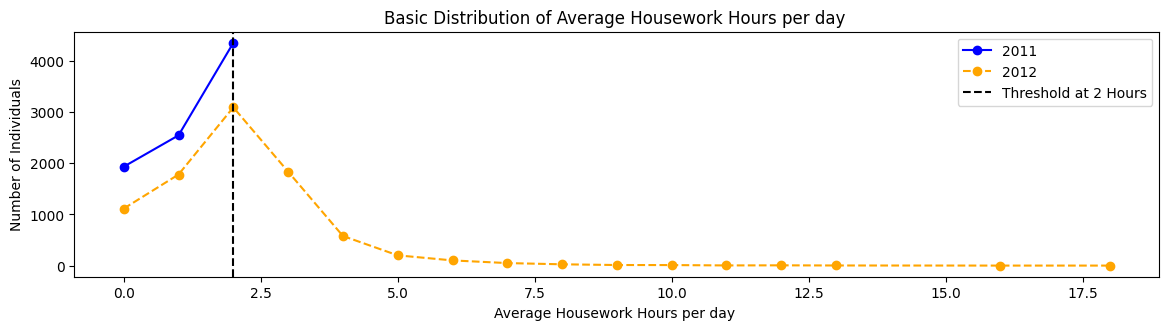

In [36]:
# Plotting the distribution of average housework hours per day for 2011 and 2012 for the specific subgroup we have identified

# Filter data for 2011 and 2012
data_2011_ = df5[df5['syear'] == 2011]
data_2012_ = df5[df5['syear'] == 2012]

# Group by avg_housework_per_day and count number of individuals
grouped_2011_basic = data_2011_.groupby('avg_housework_per_day').size()
grouped_2012_basic = data_2012_.groupby('avg_housework_per_day').size()

plt.figure(figsize=(14, 7))

# 2011 Basic Plot
plt.subplot(2, 1, 1)
plt.plot(grouped_2011_basic.index, grouped_2011_basic.values, label='2011', marker='o', color='blue')
plt.plot(grouped_2012_basic.index, grouped_2012_basic.values, label='2012', marker='o', linestyle='--', color='orange')

# Threshold line at 3 hours
plt.axvline(x=2, color='black', linestyle='--', label='Threshold at 2 Hours')

plt.title('Basic Distribution of Average Housework Hours per day ')
plt.xlabel('Average Housework Hours per day ')
plt.ylabel('Number of Individuals')
plt.legend()

In [37]:
# Create a new column 'age_cohort' based on the 'age_at_survey' column

# Define age cohorts
bins = [18, 30, 40, 50, 60, 67]
labels = ['18-29', '30-39', '40-49', '50-59', '60-66']

# Create age_cohort for the original DataFrame
df4['age_cohort'] = pd.cut(df4['age_at_survey'], bins=bins, labels=labels, right=False)

# If data_2011 and data_2012 are slices of df4, make a copy first to avoid SettingWithCopyWarning
data_2011 = data_2011.copy()
data_2012 = data_2012.copy()

# Now assign the age_cohort to these copies
data_2011['age_cohort'] = pd.cut(data_2011['age_at_survey'], bins=bins, labels=labels, right=False)
data_2012['age_cohort'] = pd.cut(data_2012['age_at_survey'], bins=bins, labels=labels, right=False)


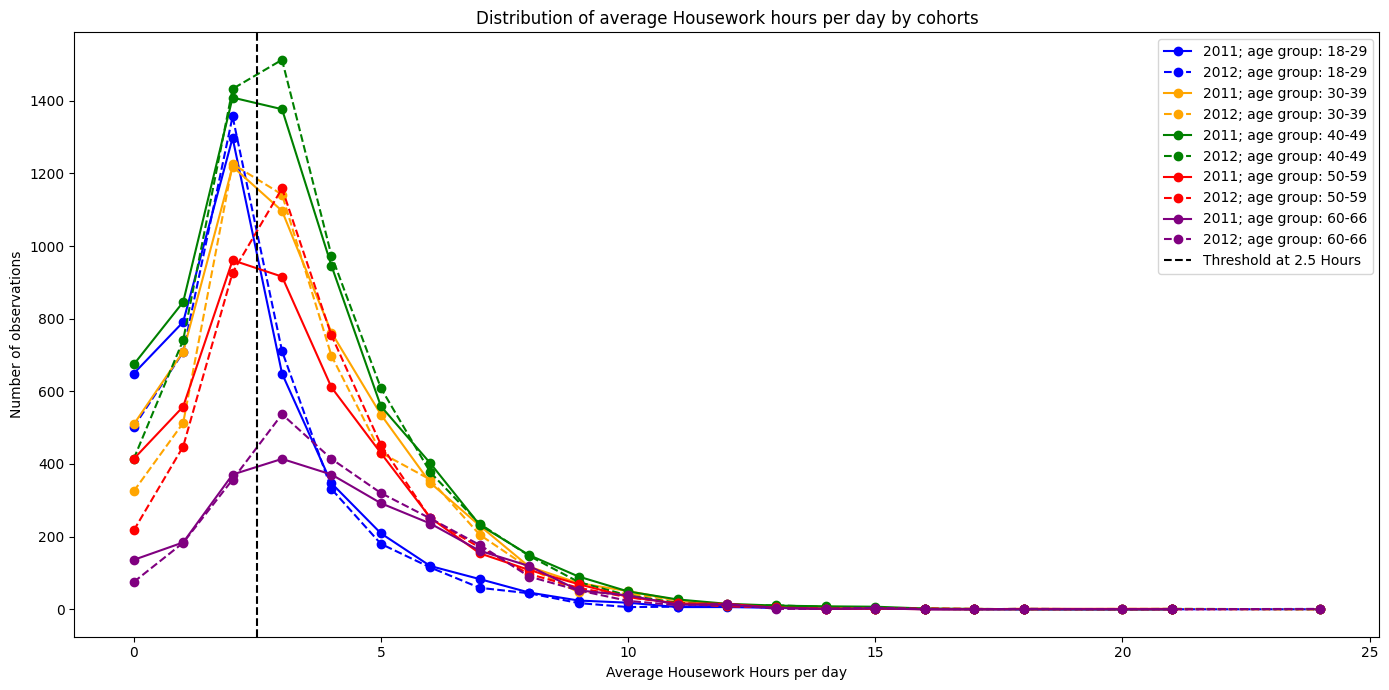

In [40]:
# plotting the distribution of average housework hours per day in 2011 and 2012 for the specific age cohorts

# Group by avg_housework_per_weekday and age cohort
grouped_2011 = data_2011.groupby(['avg_housework_per_day', 'age_cohort']).size().unstack(fill_value=0)
grouped_2012 = data_2012.groupby(['avg_housework_per_day', 'age_cohort']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, label in enumerate(labels):
    # 2011 Data
    # 2011 Data
    plt.plot(grouped_2011.index, grouped_2011[label], label=f'2011; age group: {label}', color=colors[i], marker='o')
    
    # 2012 Data
    plt.plot(grouped_2012.index, grouped_2012[label], label=f'2012; age group: {label}', linestyle='--', color=colors[i], marker='o')

# Threshold line at 2.5 hours
plt.axvline(x=2.5, color='black', linestyle='--', label='Threshold at 2.5 Hours')

# Titles and Labels
plt.title('Distribution of average Housework hours per day by cohorts')
plt.xlabel('Average Housework Hours per day')
plt.ylabel('Number of observations')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()